In [14]:
# from FeatureVisualisation.visualizer import *
# from FeatureVisualisation.utilities import *
# from FeatureVisualisation.regularizers import *

from keras.applications.vgg16 import VGG16

import keras.backend as K

import numpy as np
import matplotlib.pyplot as plt

In [15]:
from skimage.io import imread, imsave
import matplotlib.pyplot as plt

In [16]:
from skimage.transform import resize

In [17]:
from keras.applications.vgg16 import preprocess_input, decode_predictions

In [18]:
K.clear_session()

In [19]:
model = VGG16(input_shape=(None, None, 3), include_top=None, weights='imagenet')

In [23]:
content_image = preprocess_input(imread("/home/simon/Desktop/FeatureVis/eagle_original.jpg") / 1)

In [24]:
get_activations = K.Function(inputs=[model.input], outputs=[model.get_layer("block5_pool").output.op.outputs[0]] )

In [25]:
A = get_activations([content_image[np.newaxis, ::]])[0]

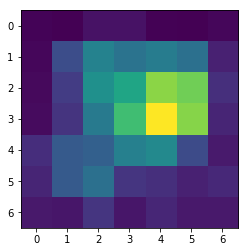

In [26]:
plt.imshow(np.sum(A[0], axis=-1));

In [71]:
visualizer = Visualizer(model)

In [72]:
def deprocess_image(x):
    # Util function to convert a tensor into a valid image.
    x /= 2.
    x += 0.5
    x *= 255.
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [73]:
import os

In [82]:
start = preprocess_input(imread("/home/simon/Desktop/prior.jpg") / 1.)

In [84]:
out_dir = "/home/simon/Desktop/eagle_2_224/"


for i in range(7):
    for j in range(7):
        
        
        print("({0}, {1})".format(i, j), end=" ")
        preds = A[0][i, j, :]
        
        # Get top 5 activations in region and their contributions
        indices = [val.item() for val in np.argpartition(preds, -5)[-5:].astype("int32")]
        weights = [val.item() for val in preds[indices].astype("int32")]
        
        
        

        # Set which layer / filters to maximize
        visualizer.set_layer_filter(["block5_pool"]*5, indices, weights=weights,
                                    regularizer=(L1, 0),
                                    activation=False,
                                    center_bias=True
                                    )
        dim = 512
        # Optimize for 300 steps and apply transformations
        image = visualizer.optimize(max_iter=512,
                                    verbose=False,
                                    transforms=[
                                        Blur(1),
                                        Jitter(4),
                                        Scale(5)
                                    ],
                                    learning_rate=0.05,
                                    input_image= start,# (np.random.random((128, 128, 3))),
                                    l2_lambda=0.005, #.005,
                                    image_dim=dim,
                                    fourier=False
                                    )
#         my_dpi = 96
#         plt.figure(figsize=(dim/my_dpi, dim/my_dpi), dpi=my_dpi, frameon=False)
#         plt.imshow(image)
#         plt.axis("off")
#         plt.show()
        # save it
        imsave(os.path.join(out_dir, "eagle_{0}_{1}.png".format(i, j)), image)
    
    

(0, 0) Optimizing on loss objective... Objective - Layer(s) = ['block5_pool', 'block5_pool', 'block5_pool', 'block5_pool', 'block5_pool'] - neuron/filters(s) =  [232, 237, 500, 486, 119]


/home/simon/anaconda3/envs/DL/lib/python3.6/site-packages/skimage/filters/_gaussian.py:108: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  warn(RuntimeWarning(msg))
/home/simon/anaconda3/envs/DL/lib/python3.6/site-packages/skimage/transform/_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
/home/simon/anaconda3/envs/DL/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/simon/anaconda3/envs/DL/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-ali

(0, 1) Optimizing on loss objective... Objective - Layer(s) = ['block5_pool', 'block5_pool', 'block5_pool', 'block5_pool', 'block5_pool'] - neuron/filters(s) =  [387, 237, 441, 119, 209]
(0, 2) Optimizing on loss objective... Objective - Layer(s) = ['block5_pool', 'block5_pool', 'block5_pool', 'block5_pool', 'block5_pool'] - neuron/filters(s) =  [39, 374, 229, 209, 189]
(0, 3) Optimizing on loss objective... Objective - Layer(s) = ['block5_pool', 'block5_pool', 'block5_pool', 'block5_pool', 'block5_pool'] - neuron/filters(s) =  [125, 189, 119, 209, 229]
(0, 4) Optimizing on loss objective... Objective - Layer(s) = ['block5_pool', 'block5_pool', 'block5_pool', 'block5_pool', 'block5_pool'] - neuron/filters(s) =  [435, 229, 209, 237, 119]
(0, 5) Optimizing on loss objective... Objective - Layer(s) = ['block5_pool', 'block5_pool', 'block5_pool', 'block5_pool', 'block5_pool'] - neuron/filters(s) =  [209, 229, 500, 119, 237]
(0, 6) Optimizing on loss objective... Objective - Layer(s) = ['bl

KeyboardInterrupt: 

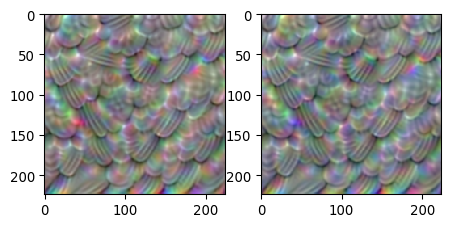

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(dim/my_dpi, dim/my_dpi), dpi=my_dpi, frameon=False)
axes[0].imshow(image)
axes[1].imshow(image[:, :, ::-1])
plt.show()

In [27]:
import tensorflow as tf

from lucid.misc.io import show
import lucid.optvis.objectives as objectives
import lucid.optvis.param as param
import lucid.optvis.render as render
import lucid.optvis.transform as transform

import lucid.optvis.render as render

https://medium.com/@pipidog/how-to-convert-your-keras-models-to-tensorflow-e471400b886a

In [28]:
def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    """
    Freezes the state of a session into a pruned computation graph.

    Creates a new computation graph where variable nodes are replaced by
    constants taking their current value in the session. The new graph will be
    pruned so subgraphs that are not necessary to compute the requested
    outputs are removed.
    @param session The TensorFlow session to be frozen.
    @param keep_var_names A list of variable names that should not be frozen,
                          or None to freeze all the variables in the graph.
    @param output_names Names of the relevant graph outputs.
    @param clear_devices Remove the device directives from the graph for better portability.
    @return The frozen graph definition.
    """
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = tf.graph_util.convert_variables_to_constants(
            session, input_graph_def, output_names, freeze_var_names)
        return frozen_graph

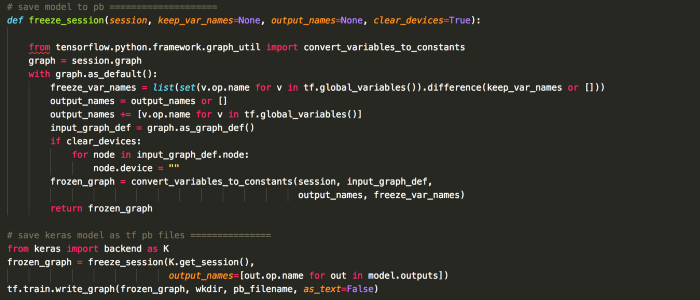

In [29]:
frozen_graph = freeze_session(K.get_session(),
                             output_names=[out.op.name for out in model.outputs])

tf.train.write_graph(frozen_graph, "./", "vgg16.pb", as_text=False)

Instructions for updating:
Use tf.compat.v1.graph_util.convert_variables_to_constants


Instructions for updating:
Use tf.compat.v1.graph_util.convert_variables_to_constants


Instructions for updating:
Use tf.compat.v1.graph_util.extract_sub_graph


Instructions for updating:
Use tf.compat.v1.graph_util.extract_sub_graph


INFO:tensorflow:Froze 26 variables.


INFO:tensorflow:Froze 26 variables.


INFO:tensorflow:Converted 26 variables to const ops.


INFO:tensorflow:Converted 26 variables to const ops.


'./vgg16.pb'

In [30]:
graph_file = "./vgg16.pb"
graph_def = tf.GraphDef()
with open(graph_file, "rb") as f:
    graph_def.ParseFromString(f.read())
#for node in graph_def.node:
#    print(node.name)

In [31]:
from lucid.modelzoo.vision_base import Model

In [32]:
class VGG16_Lucid(Model):
  model_path = "./vgg16.pb"
  image_shape = [128, 128]
  image_value_range = (-127, 127)
  input_name = 'input_1'

In [33]:
vgg = VGG16_Lucid()
vgg.load_graphdef()

The the names of the layers you want to visualise

In [40]:
for node in vgg.graph_def.node:
    print(node.name)

input_1
block1_conv1/kernel
block1_conv1/kernel/read
block1_conv1/bias
block1_conv1/bias/read
block1_conv1/convolution
block1_conv1/BiasAdd
block1_conv1/Relu
block1_conv2/kernel
block1_conv2/kernel/read
block1_conv2/bias
block1_conv2/bias/read
block1_conv2/convolution
block1_conv2/BiasAdd
block1_conv2/Relu
block1_pool/MaxPool
block2_conv1/kernel
block2_conv1/kernel/read
block2_conv1/bias
block2_conv1/bias/read
block2_conv1/convolution
block2_conv1/BiasAdd
block2_conv1/Relu
block2_conv2/kernel
block2_conv2/kernel/read
block2_conv2/bias
block2_conv2/bias/read
block2_conv2/convolution
block2_conv2/BiasAdd
block2_conv2/Relu
block2_pool/MaxPool
block3_conv1/kernel
block3_conv1/kernel/read
block3_conv1/bias
block3_conv1/bias/read
block3_conv1/convolution
block3_conv1/BiasAdd
block3_conv1/Relu
block3_conv2/kernel
block3_conv2/kernel/read
block3_conv2/bias
block3_conv2/bias/read
block3_conv2/convolution
block3_conv2/BiasAdd
block3_conv2/Relu
block3_conv3/kernel
block3_conv3/kernel/read
block3_

(0, 0) 512 926.65796



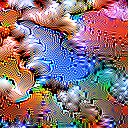

(0, 1) 512 771.221



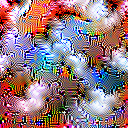

(0, 2) 512 2190.1868



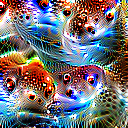

(0, 3) 512 1360.0015



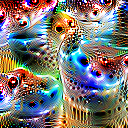

(0, 4) 512 894.9586



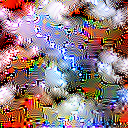

(0, 5) 512 935.8086



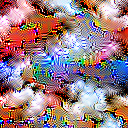

(0, 6) 512 1101.0953



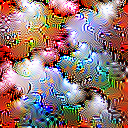

(1, 0) 512 912.82684



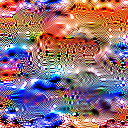

(1, 1) 512 9884.696



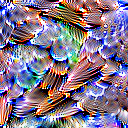

(1, 2) 512 8358.723



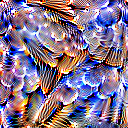

(1, 3) 512 3820.1653



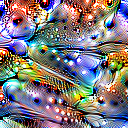

(1, 4) 512 3895.732



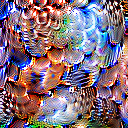

(1, 5) 512 4028.8823



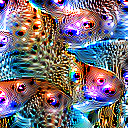

(1, 6) 512 3346.9944



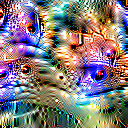

(2, 0) 512 990.41986



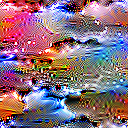

(2, 1) 512 6791.4937



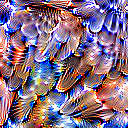

(2, 2) 512 9150.123



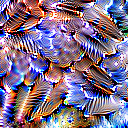

(2, 3) 512 5426.906



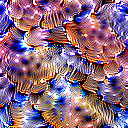

(2, 4) 512 10862.789



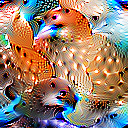

(2, 5) 512 17676.846



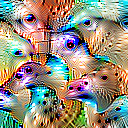

(2, 6) 512 3786.0203



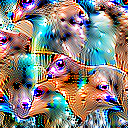

(3, 0) 512 1288.6635



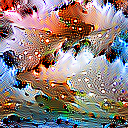

(3, 1) 512 2895.524



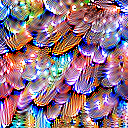

(3, 2) 512 5373.2173



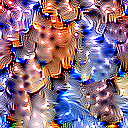

(3, 3) 512 11934.247



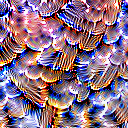

(3, 4) 512 15683.126



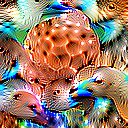

(3, 5) 512 16935.75



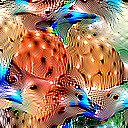

(3, 6) 512 2104.7686



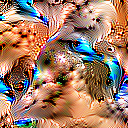

(4, 0) 512 1324.3956



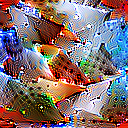

(4, 1) 512 7870.871



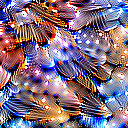

(4, 2) 512 7845.4893



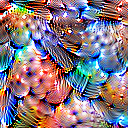

(4, 3) 512 10619.44



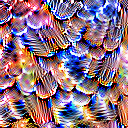

(4, 4) 512 10893.254



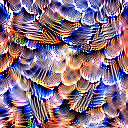

(4, 5) 512 2660.08



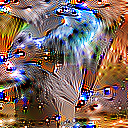

(4, 6) 512 2240.6697



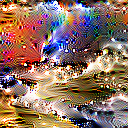

(5, 0) 512 798.36



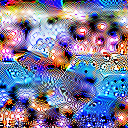

(5, 1) 512 6535.9893



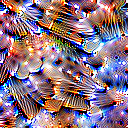

(5, 2) 512 6714.4463



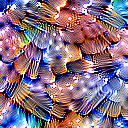

(5, 3) 512 3199.3933



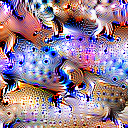

(5, 4) 512 1565.2479



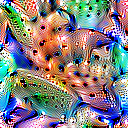

(5, 5) 512 2314.3752



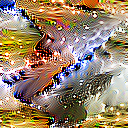

(5, 6) 512 2730.138



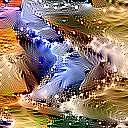

(6, 0) 512 975.74817



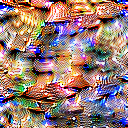

(6, 1) 512 1153.4717



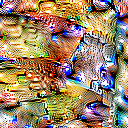

(6, 2) 512 1749.3795



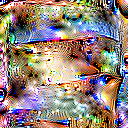

(6, 3) 512 1639.6298



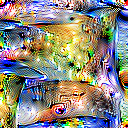

(6, 4) 512 691.82904



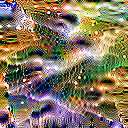

(6, 5) 512 808.39923



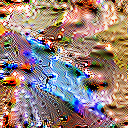

(6, 6) 512 941.96594



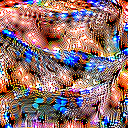

In [105]:
param_f = lambda: param.image(128, fft=True, decorrelate=True)
transforms = [
    transform.pad(16),
    transform.jitter(8),
    transform.random_scale([n/100. for n in range(80, 120)]),
    transform.jitter(2),
]

channel = lambda n: objectives.channel("block5_conv3/BiasAdd", n)

objectives.blur_input_each_step()

for i in range(7):
    for j in range(7):
        
        
        print("({0}, {1})".format(i, j), end=" ")
        preds = A[0][i, j, :]
        
        # Get top 5 activations in region and their contributions
        indices = [val.item() for val in np.argpartition(preds, -5)[-5:].astype("int32")]
        weights = [val.item() for val in preds[indices].astype("int32")]

        obj = 0
        for w, ind in enumerate(indices):
            obj += weights[w]*channel(ind)
            
        # Blur the image as well
        obj += 0.02* objectives.blur_input_each_step()

        images = render.render_vis(vgg, obj, param_f, thresholds=[512], transforms=transforms)
                
        # save it
        imsave(os.path.join(out_dir, "eagle_{0}_{1}.png".format(i, j)), images[-1][0])
        

In [101]:
help(objectives.blur_input_each_step())

Help on Objective in module lucid.optvis.objectives object:

class Objective(builtins.object)
 |  "A wrapper to make objective functions easy to combine.
 |  
 |  For example, suppose you want to optimize 20% for mixed4a:20 and 80% for
 |  mixed4a:21. Then you could use:
 |  
 |    objetive = 0.2 * channel("mixed4a", 20) + 0.8 * channel("mixed4a", 21)
 |  
 |  Under the hood, we think of objectives as functions of the form:
 |  
 |    T => tensorflow scalar for loss
 |  
 |  where T is a function allowing you to index layers in the network -- that is,
 |  if there's a layer "mixed4a" then T("mixed4a") would give you its
 |  activations).
 |  
 |  This allows objectives to be declared outside the rendering function, but then
 |  actually constructed within its graph/session.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, other)
 |  
 |  __call__(self, T)
 |      Call self as a function.
 |  
 |  __init__(self, objective_func, name='', description='')
 |      Initialize self.  See

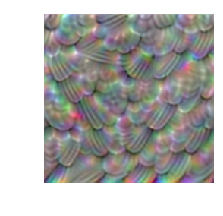

In [107]:
my_dpi = 96
plt.figure(figsize=(224/my_dpi, 224/my_dpi), dpi=my_dpi, frameon=False)
plt.imshow(image)
plt.axis("off")
plt.show()

In [85]:
from skimage.transform.radon_transform import fft, ifft

In [70]:
# Numpy equivalent
def rfft2d_freqs(h, w):
    """Computes 2D spectrum frequencies."""

    fy = np.fft.fftfreq(h)[:, None]
    # when we have an odd input dimension we need to keep one additional
    # frequency and later cut off 1 pixel
    if w % 2 == 1:
        fx = np.fft.fftfreq(w)[:]
    else:
        fx = np.fft.fftfreq(w)[:]
    return np.sqrt(fx * fx + fy * fy)

def fft_image(shape, sd=None, decay_power=1):
    """An image paramaterization using 2D Fourier coefficients."""

    sd = sd or 0.01
    batch, h, w, ch = shape
    freqs = rfft2d_freqs(h, w)
    init_val_size = (2, ch) + freqs.shape

    # Randomise the values
    init_val = np.random.normal(size=init_val_size, scale=sd).astype(np.float32)
    # Compose of real and imaginary parts
    spectrum_t = init_val[0] + init_val[1]*1j

    # Scale the spectrum. First normalize energy, then scale by the square-root
    # of the number of pixels to get a unitary transformation.
    # This allows to use similar leanring rates to pixel-wise optimisation.
    scale = 1.0 / np.maximum(freqs, 1.0 / max(w, h)) ** decay_power
    scale *= np.sqrt(w * h)
    scaled_spectrum_t = scale * spectrum_t

    image_t = np.fft.ifft2(np.transpose(scaled_spectrum_t, (1, 2, 0))).real

    return image_t # Magic constant

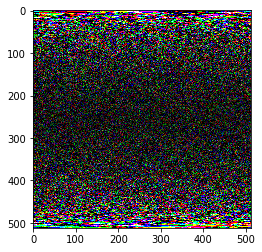

In [73]:
decay_power = 1
shape = (1, 512, 512, 3)
sd = 0.01
batch, h, w, ch = shape
freqs = rfft2d_freqs(h, w)
init_val_size = (2, ch) + freqs.shape

image_t = fft_image(shape, sd)

plt.imshow(image_t);

In [53]:
model.input.shape

TensorShape([Dimension(None), Dimension(None), Dimension(None), Dimension(3)])

In [35]:
M = np.array([[1, 1, 1, 1, 1, 1, 1],
          [1, 2, 2, 2, 2, 2, 1],
          [1, 2, 3, 3, 3, 2, 1],
          [1, 2, 3, 4, 3, 2, 1],
          [1, 2, 3, 3, 3, 2, 1],
          [1, 2, 2, 2, 2, 2, 1],
          [1, 1, 1, 1, 1, 1, 1]
         ])